# Pre lec HW 

# 1. Start a ChatBot session to understand what a Classification Decision Tree is: 
## - (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and 
## - provide some examples of real-world applications where this might be particularly useful, and then 
## - (b) the difference between how a Classification Decision Tree (CDT) makes (classification) predictions versus how Multiple Linear Regression (MLR) makes (regression) predictions?

The Classification Decision Tree (CDT) is a tool used to sort data into categories, like a flow chart by asking yes/no or multiple choice questions until reaching a final decision. It addressed categorical problems/data, and can be used for things like determining if an email is "spam" or "not spam", predicting whether a loan applicant is "high-risk" or "low-risk", or classifying animals into species based on their traits. The CDT makes predicitons by splitting data into categorical groups whereas MLR makes predictions by calculating a weighted sum of input variables and the result is a continuous value. The MLR assumes a linear relationship between inputs and the output. CDT is for categorical data and MLR is for numeric data. 

# 2. Continue your ChatBot session and explore with your ChatBot:
## - what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

Accuracy is most appropriate in scenarios where the costs of false positives (FP) and false negatives (FN) are relatively equal and the dataset is balanced. This is important because for example in a dataset where one class dominates (unbalanced) (e.g., 95% of the data is "Class A"), a model can achieve high accuracy simply by always predicting the majority class. It is used in situations like spam email detection, quality control in manufacturing or weather prediction. Therefore if the dataset is unbalanced, other metrics may be more useful.

The sensitivity metric is most appropriate in scenarios where identifying true positives (TP) is critical, and minimizing false negatives (FN) is more important than false positives (FP). Sensitivity focuses only on actual positives, so it works best when missing positive cases has higher costs. By focusing on sensitivity, decision-makers emphasize reducing critical risks, ensuring that every possible positive case is flagged for further review or action. It is used in scenarios like medical diagnostics, for example cancer. Missing a cancer case (FN) can have severe consequences, so correctly identifying as many true cases as possible is the priority, even if some healthy patients are falsely flagged (FP). It can also be used for fraudulent transactions detection, or search and rescue operations. 

The metric specificity is most appropriate in scenarios where minimizing false positives (FP) is crucial, and correctly identifying true negatives (TN) is a priority. This can be used in situations like medical screening for a rare disease where a condition has a very low prevalence and false positives could lead to unnecessary, expensive, or invasive follow-up tests for healthy individuals. It can also be used for spam email filtering, legal and security systems, or product quality control (defective vs non defective products). In certain situations, the cost of a false positive is higher than a false negative, and specificity is used. 

The metric precision is most appropriate in scenarios where the focus is on the reliability of positive predictions, and minimizing false positives (FP) is more critical than false negatives (FN). Precision is vital when false alarms are costly or harmful, such as wasting resources, causing unnecessary anxiety, or reducing trust in the system. It is most commonly used in scenarios like spam email detection, fraud detection, medical testing, and search engines or recomendation systems. 

# 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

## a) remove Weight_oz, Width, and Height
## b) drop all remaining rows with NaN entries
## c) set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove specified columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Drop all rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


# 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

## Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [3]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
The above step creates a binary target variable y where y = 1 if the book is "Hardcover" and y = 0 if the book is "Paperback". The pd.get_dummies function converts the categorical column Hard_or_Paper into dummy/indicator variables, and ['H'] selects the column representing "Hardcover."

X = ab_reduced_noNaN[['List Price']]
The above step selects the List Price column as the input feature matrix X for the model, and since [['List Price']] is double-bracketed, it ensures X is a DataFrame (required by scikit-learn models).

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 255
Testing set size: 64


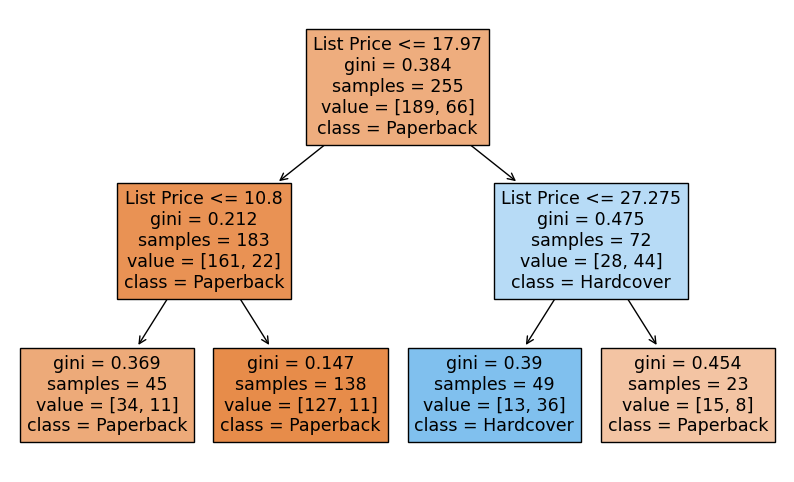

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the classifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

# Post-lecture HW

# 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

## 1. X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
## 2. max_depth set to 4

In [6]:
# Define the input features (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with a max depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

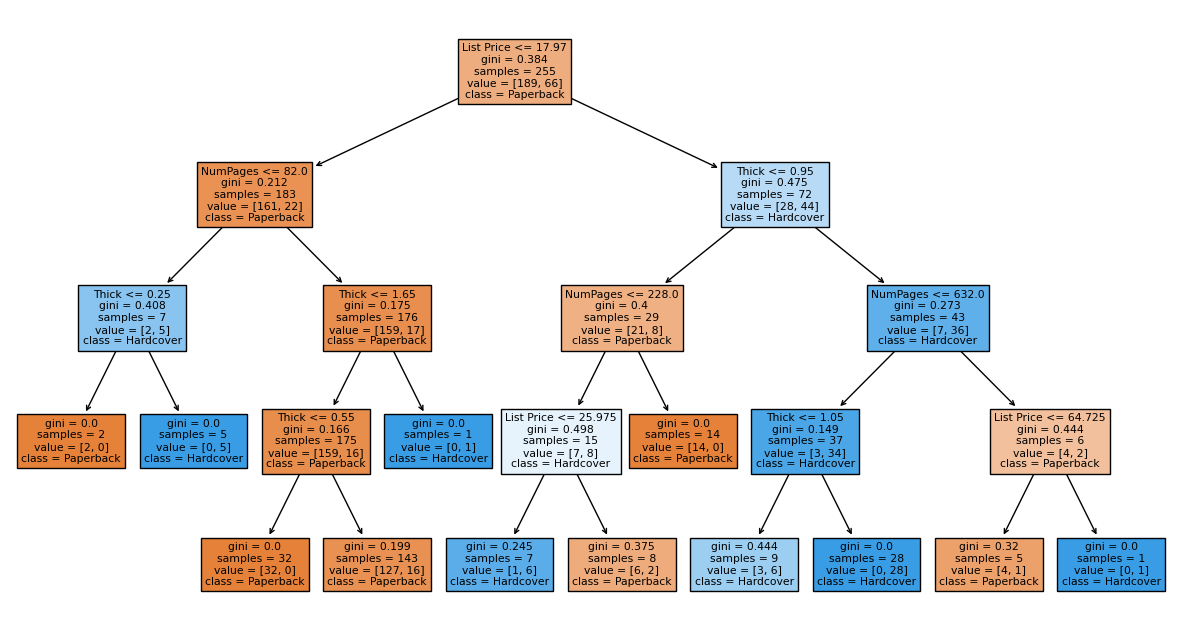

In [7]:
# Plot the decision tree with feature names and class names
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True
)
plt.show()

Predictions for the clf2 model are made by feature-based splits, a hierarchy of decisions, and leaf nodes. First, the tree splits the data based on values of the features NumPages, Thick, and List Price. Then, at each split, the decision is made to maximize the separation between the two classes (Paperback and Hardcover). Afterwards, the tree examines NumPages, Thick, and List Price step by step, deciding at each level which feature threshold gives the best separation of classes. Lastly, at the leaves (endpoints of the tree), the model predicts a class (Paperback or Hardcover) based on the majority of training examples in that node. The max_depth=4 ensures up to 4 levels of splits, allowing for more detailed decision-making while preventing overfitting. 

# 6.  Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models



In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Clean the dataset
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore').dropna()

# Define target variable y
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Define features for clf (List Price only) and clf2 (multiple features)
X1 = ab_reduced_noNaN[['List Price']]
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train the Decision Tree models
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train1, y_train1)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train2)

# Make predictions
y_pred_clf = clf.predict(X_test1)
y_pred_clf2 = clf2.predict(X_test2)

# Generate confusion matrices
conf_matrix_clf = confusion_matrix(y_test1, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test2, y_pred_clf2)

# Calculate metrics for clf
accuracy_clf = accuracy_score(y_test1, y_pred_clf)
sensitivity_clf = recall_score(y_test1, y_pred_clf)  # Sensitivity = Recall for positive class
specificity_clf = conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1])

# Calculate metrics for clf2
accuracy_clf2 = accuracy_score(y_test2, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test2, y_pred_clf2)
specificity_clf2 = conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1])

# Print results
print("Metrics for clf (List Price):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")

Metrics for clf (List Price):
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091

Metrics for clf2 (NumPages, Thick, List Price):
Accuracy: 0.8594
Sensitivity: 0.7500
Specificity: 0.9091


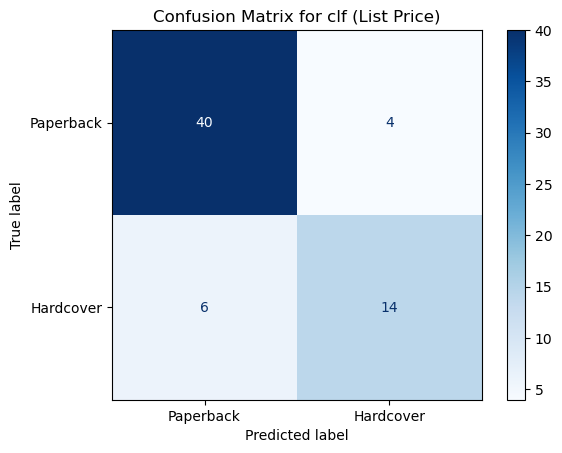

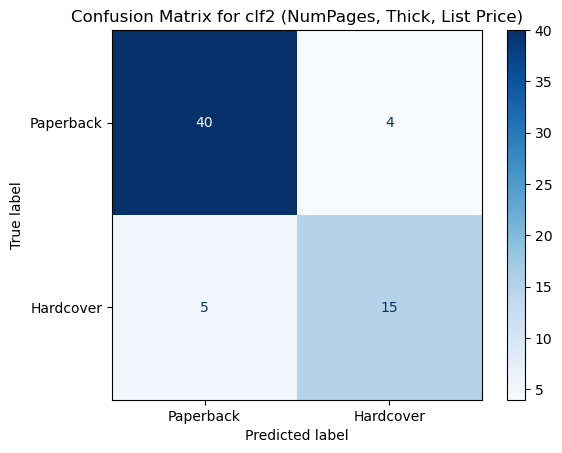

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf (List Price)")
plt.show()

# Display confusion matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues')
plt.title("Confusion Matrix for clf2 (NumPages, Thick, List Price)")
plt.show()

# 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

ConfusionMatrixDisplay(

    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
    
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
                     
ConfusionMatrixDisplay(

    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
    
                     clf.predict(
                     
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                         
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The differences between the two confusion matrices arise because the first confusion matrix uses only List Price as the feature, while the second uses multiple features (NumPages, Thick, and List Price) for predictions. The model with multiple features has more information to make decisions, potentially capturing complex relationships between the features and the target variable. However, these confusion matrices are based on predictions made on the training set, leading to potentially overoptimistic results due to overfitting. The confusion matrices for clf and clf2 evaluated on the test set are better because they reflect the models' performance on unseen data, providing a more realistic measure of their generalization ability.

# 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

# 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

Chat log (for entire chat): https://chatgpt.com/share/673fecff-a6e8-8003-ae40-3c9a830a0d3e

We discussed the fundamentals of classification decision trees, including how they classify data by splitting features based on thresholds. These trees are commonly used for categorical predictions, such as determining whether a book is a hardcover or paperback. We explored metrics to evaluate such models, including accuracy, sensitivity (focused on minimizing false negatives), specificity (focused on minimizing false positives), and precision (focused on the reliability of positive predictions). Understanding these metrics helps assess how well a model generalizes to unseen data.

Using the amazonbooks.csv dataset, we processed the data by removing unnecessary columns, dropping rows with missing values, and converting data types for consistency. Two decision tree models were trained: one (clf) used a single feature (List Price), and the other (clf2) used multiple features (NumPages, Thick, and List Price). Both models were evaluated on test data, and their confusion matrices and performance metrics were calculated. We also visualized the confusion matrices for both models to better understand their performance.

The importance of feature contributions in decision trees was also highlighted. We explored how clf2 determined the relative importance of features using the feature_importances_ attribute. A horizontal bar chart was created to visualize these importances, revealing that List Price was the most influential feature for predictions in clf2. This insight emphasizes the role of specific variables in improving model accuracy.

Finally, we addressed the potential issue of overfitting in decision trees, stressing the importance of methods like GridSearchCV to optimize parameters such as max_depth. Throughout the discussion, we provided clear explanations, practical code implementations, and visualizations to support the concepts and analyses. Let me know if you’d like further assistance or clarification!